In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [   0    3    6 ... 1408 1409 1410] TEST: [   1    2    4    5    8    9   14   18   19   27   29   31   34   39
   40   44   45   47   49   52   53   54   55   56   58   61   75   80
   85   92  108  124  140  141  142  148  152  156  159  161  182  184
  186  192  194  198  202  204  211  215  224  227  231  233  240  241
  247  251  253  254  260  268  269  270  276  278  279  283  295  298
  299  300  302  303  308  310  312  315  317  319  320  322  326  330
  333  338  342  353  361  362  363  364  376  381  390  393  399  408
  411  412  416  420  422  425  427  431  434  440  442  443  445  446
  461  464  465  466  467  471  472  474  479  481  482  487  489  491
  494  500  505  506  511  512  513  517  520  526  528  529  533  535
  536  542  546  548  549  554  557  563  565  567  568  572  574  575
  578  579  587  589  597  608  610  615  638  641  644  646  651  656
  662  666  667  670  672  682  687  689  695  703  708  711  712  713
  716  717  721  722  728  7

## XGBoost

In [5]:
#XGB_model = xgb.XGBClassifier(silent=False, 
#                      learning_rate=0.005,  
#                      colsample_bytree = 0.5,
#                      subsample = 0.8,
#                      objective='multi:softprob', 
#                      n_estimators=1000, 
#                      reg_alpha = 0.2,
#                      reg_lambda = .5,
#                      max_depth=5, 
#                      gamma=5,
#                      seed=82)

XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 50,
                      reg_lambda = .5,
                      max_depth=5, 
                      gamma=0,
                      seed=82)


# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[14:14:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.06421	validation_0-mlogloss:1.09442	validation_1-merror:0.07082	validation_1-mlogloss:1.09453
[1]	validation_0-merror:0.06421	validation_0-mlogloss:1.08913	validation_1-merror:0.07082	validation_1-mlogloss:1.08929
[2]	validation_0-merror:0.06421	validation_0-mlogloss:1.08391	validation_1-merror:0.07082	validation_1-mlogloss:1.08413
[3]	validation_0-merror:0.06421	validation_0-mlogloss:1.07966	validation_1-merror:0.07082	validation_1-mlogloss:1.07996
[4]	validation_0-merror:0.06327	validation_0-mlogloss:1.07550	validation_1-merror:0.07082	validation_1-mlogloss:1.07593
[5]	validation_0-merror:0.06327	validation_

[65]	validation_0-merror:0.06421	validation_0-mlogloss:0.84154	validation_1-merror:0.07082	validation_1-mlogloss:0.84605
[66]	validation_0-merror:0.06421	validation_0-mlogloss:0.83887	validation_1-merror:0.07082	validation_1-mlogloss:0.84345
[67]	validation_0-merror:0.06421	validation_0-mlogloss:0.83687	validation_1-merror:0.07082	validation_1-mlogloss:0.84161
[68]	validation_0-merror:0.06421	validation_0-mlogloss:0.83419	validation_1-merror:0.07082	validation_1-mlogloss:0.83903
[69]	validation_0-merror:0.06421	validation_0-mlogloss:0.83083	validation_1-merror:0.07082	validation_1-mlogloss:0.83571
[70]	validation_0-merror:0.06421	validation_0-mlogloss:0.82751	validation_1-merror:0.07082	validation_1-mlogloss:0.83241
[71]	validation_0-merror:0.06421	validation_0-mlogloss:0.82485	validation_1-merror:0.07082	validation_1-mlogloss:0.82981
[72]	validation_0-merror:0.06421	validation_0-mlogloss:0.82156	validation_1-merror:0.07082	validation_1-mlogloss:0.82654
[73]	validation_0-merror:0.06421

[133]	validation_0-merror:0.06421	validation_0-mlogloss:0.67096	validation_1-merror:0.07082	validation_1-mlogloss:0.67827
[134]	validation_0-merror:0.06421	validation_0-mlogloss:0.66868	validation_1-merror:0.07082	validation_1-mlogloss:0.67599
[135]	validation_0-merror:0.06421	validation_0-mlogloss:0.66638	validation_1-merror:0.07082	validation_1-mlogloss:0.67371
[136]	validation_0-merror:0.06421	validation_0-mlogloss:0.66460	validation_1-merror:0.07082	validation_1-mlogloss:0.67198
[137]	validation_0-merror:0.06421	validation_0-mlogloss:0.66234	validation_1-merror:0.07082	validation_1-mlogloss:0.66974
[138]	validation_0-merror:0.06421	validation_0-mlogloss:0.66061	validation_1-merror:0.07082	validation_1-mlogloss:0.66802
[139]	validation_0-merror:0.06421	validation_0-mlogloss:0.65838	validation_1-merror:0.07082	validation_1-mlogloss:0.66580
[140]	validation_0-merror:0.06421	validation_0-mlogloss:0.65615	validation_1-merror:0.07082	validation_1-mlogloss:0.66358
[141]	validation_0-merro

[201]	validation_0-merror:0.06421	validation_0-mlogloss:0.55595	validation_1-merror:0.07082	validation_1-mlogloss:0.56470
[202]	validation_0-merror:0.06421	validation_0-mlogloss:0.55474	validation_1-merror:0.07082	validation_1-mlogloss:0.56351
[203]	validation_0-merror:0.06421	validation_0-mlogloss:0.55311	validation_1-merror:0.07082	validation_1-mlogloss:0.56188
[204]	validation_0-merror:0.06421	validation_0-mlogloss:0.55150	validation_1-merror:0.07082	validation_1-mlogloss:0.56028
[205]	validation_0-merror:0.06421	validation_0-mlogloss:0.54988	validation_1-merror:0.07082	validation_1-mlogloss:0.55866
[206]	validation_0-merror:0.06421	validation_0-mlogloss:0.54828	validation_1-merror:0.07082	validation_1-mlogloss:0.55707
[207]	validation_0-merror:0.06421	validation_0-mlogloss:0.54670	validation_1-merror:0.07082	validation_1-mlogloss:0.55549
[208]	validation_0-merror:0.06421	validation_0-mlogloss:0.54510	validation_1-merror:0.07082	validation_1-mlogloss:0.55389
[209]	validation_0-merro

[269]	validation_0-merror:0.06421	validation_0-mlogloss:0.47241	validation_1-merror:0.07082	validation_1-mlogloss:0.48190
[270]	validation_0-merror:0.06421	validation_0-mlogloss:0.47189	validation_1-merror:0.07082	validation_1-mlogloss:0.48142
[271]	validation_0-merror:0.06421	validation_0-mlogloss:0.47138	validation_1-merror:0.07082	validation_1-mlogloss:0.48095
[272]	validation_0-merror:0.06421	validation_0-mlogloss:0.47054	validation_1-merror:0.07082	validation_1-mlogloss:0.48012
[273]	validation_0-merror:0.06421	validation_0-mlogloss:0.46970	validation_1-merror:0.07082	validation_1-mlogloss:0.47930
[274]	validation_0-merror:0.06421	validation_0-mlogloss:0.46855	validation_1-merror:0.07082	validation_1-mlogloss:0.47815
[275]	validation_0-merror:0.06421	validation_0-mlogloss:0.46739	validation_1-merror:0.07082	validation_1-mlogloss:0.47699
[276]	validation_0-merror:0.06421	validation_0-mlogloss:0.46623	validation_1-merror:0.07082	validation_1-mlogloss:0.47583
[277]	validation_0-merro

[337]	validation_0-merror:0.06421	validation_0-mlogloss:0.41383	validation_1-merror:0.07082	validation_1-mlogloss:0.42393
[338]	validation_0-merror:0.06421	validation_0-mlogloss:0.41324	validation_1-merror:0.07082	validation_1-mlogloss:0.42335
[339]	validation_0-merror:0.06421	validation_0-mlogloss:0.41236	validation_1-merror:0.07082	validation_1-mlogloss:0.42247
[340]	validation_0-merror:0.06421	validation_0-mlogloss:0.41178	validation_1-merror:0.07082	validation_1-mlogloss:0.42190
[341]	validation_0-merror:0.06421	validation_0-mlogloss:0.41091	validation_1-merror:0.07082	validation_1-mlogloss:0.42103
[342]	validation_0-merror:0.06421	validation_0-mlogloss:0.41008	validation_1-merror:0.07082	validation_1-mlogloss:0.42019
[343]	validation_0-merror:0.06421	validation_0-mlogloss:0.40950	validation_1-merror:0.07082	validation_1-mlogloss:0.41962
[344]	validation_0-merror:0.06421	validation_0-mlogloss:0.40864	validation_1-merror:0.07082	validation_1-mlogloss:0.41876
[345]	validation_0-merro

[405]	validation_0-merror:0.06421	validation_0-mlogloss:0.37050	validation_1-merror:0.07082	validation_1-mlogloss:0.38079
[406]	validation_0-merror:0.06421	validation_0-mlogloss:0.36982	validation_1-merror:0.07082	validation_1-mlogloss:0.38011
[407]	validation_0-merror:0.06421	validation_0-mlogloss:0.36937	validation_1-merror:0.07082	validation_1-mlogloss:0.37967
[408]	validation_0-merror:0.06421	validation_0-mlogloss:0.36872	validation_1-merror:0.07082	validation_1-mlogloss:0.37902
[409]	validation_0-merror:0.06421	validation_0-mlogloss:0.36806	validation_1-merror:0.07082	validation_1-mlogloss:0.37836
[410]	validation_0-merror:0.06421	validation_0-mlogloss:0.36740	validation_1-merror:0.07082	validation_1-mlogloss:0.37770
[411]	validation_0-merror:0.06421	validation_0-mlogloss:0.36697	validation_1-merror:0.07082	validation_1-mlogloss:0.37727
[412]	validation_0-merror:0.06421	validation_0-mlogloss:0.36633	validation_1-merror:0.07082	validation_1-mlogloss:0.37662
[413]	validation_0-merro

[473]	validation_0-merror:0.06421	validation_0-mlogloss:0.33725	validation_1-merror:0.07082	validation_1-mlogloss:0.34763
[474]	validation_0-merror:0.06421	validation_0-mlogloss:0.33692	validation_1-merror:0.07082	validation_1-mlogloss:0.34731
[475]	validation_0-merror:0.06421	validation_0-mlogloss:0.33661	validation_1-merror:0.07082	validation_1-mlogloss:0.34700
[476]	validation_0-merror:0.06421	validation_0-mlogloss:0.33607	validation_1-merror:0.07082	validation_1-mlogloss:0.34647
[477]	validation_0-merror:0.06421	validation_0-mlogloss:0.33558	validation_1-merror:0.07082	validation_1-mlogloss:0.34597
[478]	validation_0-merror:0.06421	validation_0-mlogloss:0.33506	validation_1-merror:0.07082	validation_1-mlogloss:0.34545
[479]	validation_0-merror:0.06421	validation_0-mlogloss:0.33456	validation_1-merror:0.07082	validation_1-mlogloss:0.34495
[480]	validation_0-merror:0.06421	validation_0-mlogloss:0.33407	validation_1-merror:0.07082	validation_1-mlogloss:0.34445
[481]	validation_0-merro

[541]	validation_0-merror:0.06421	validation_0-mlogloss:0.31156	validation_1-merror:0.07082	validation_1-mlogloss:0.32194
[542]	validation_0-merror:0.06421	validation_0-mlogloss:0.31118	validation_1-merror:0.07082	validation_1-mlogloss:0.32155
[543]	validation_0-merror:0.06421	validation_0-mlogloss:0.31111	validation_1-merror:0.07082	validation_1-mlogloss:0.32149
[544]	validation_0-merror:0.06421	validation_0-mlogloss:0.31072	validation_1-merror:0.07082	validation_1-mlogloss:0.32109
[545]	validation_0-merror:0.06421	validation_0-mlogloss:0.31034	validation_1-merror:0.07082	validation_1-mlogloss:0.32071
[546]	validation_0-merror:0.06421	validation_0-mlogloss:0.30994	validation_1-merror:0.07082	validation_1-mlogloss:0.32031
[547]	validation_0-merror:0.06421	validation_0-mlogloss:0.30956	validation_1-merror:0.07082	validation_1-mlogloss:0.31993
[548]	validation_0-merror:0.06421	validation_0-mlogloss:0.30916	validation_1-merror:0.07082	validation_1-mlogloss:0.31953
[549]	validation_0-merro

[609]	validation_0-merror:0.05571	validation_0-mlogloss:0.29136	validation_1-merror:0.06516	validation_1-mlogloss:0.30165
[610]	validation_0-merror:0.05571	validation_0-mlogloss:0.29106	validation_1-merror:0.06516	validation_1-mlogloss:0.30135
[611]	validation_0-merror:0.05571	validation_0-mlogloss:0.29075	validation_1-merror:0.06516	validation_1-mlogloss:0.30104
[612]	validation_0-merror:0.05571	validation_0-mlogloss:0.29059	validation_1-merror:0.06516	validation_1-mlogloss:0.30089
[613]	validation_0-merror:0.05571	validation_0-mlogloss:0.29042	validation_1-merror:0.06516	validation_1-mlogloss:0.30072
[614]	validation_0-merror:0.05571	validation_0-mlogloss:0.29011	validation_1-merror:0.06232	validation_1-mlogloss:0.30040
[615]	validation_0-merror:0.05571	validation_0-mlogloss:0.28980	validation_1-merror:0.06232	validation_1-mlogloss:0.30010
[616]	validation_0-merror:0.05477	validation_0-mlogloss:0.28950	validation_1-merror:0.06232	validation_1-mlogloss:0.29979
[617]	validation_0-merro

[677]	validation_0-merror:0.05005	validation_0-mlogloss:0.27671	validation_1-merror:0.05949	validation_1-mlogloss:0.28700
[678]	validation_0-merror:0.05005	validation_0-mlogloss:0.27648	validation_1-merror:0.05949	validation_1-mlogloss:0.28676
[679]	validation_0-merror:0.05005	validation_0-mlogloss:0.27622	validation_1-merror:0.05949	validation_1-mlogloss:0.28650
[680]	validation_0-merror:0.05005	validation_0-mlogloss:0.27608	validation_1-merror:0.05949	validation_1-mlogloss:0.28636
[681]	validation_0-merror:0.05005	validation_0-mlogloss:0.27606	validation_1-merror:0.05949	validation_1-mlogloss:0.28635
[682]	validation_0-merror:0.05005	validation_0-mlogloss:0.27580	validation_1-merror:0.05949	validation_1-mlogloss:0.28608
[683]	validation_0-merror:0.05005	validation_0-mlogloss:0.27577	validation_1-merror:0.05949	validation_1-mlogloss:0.28606
[684]	validation_0-merror:0.05005	validation_0-mlogloss:0.27553	validation_1-merror:0.05949	validation_1-mlogloss:0.28581
[685]	validation_0-merro

[745]	validation_0-merror:0.05005	validation_0-mlogloss:0.26477	validation_1-merror:0.05949	validation_1-mlogloss:0.27500
[746]	validation_0-merror:0.05005	validation_0-mlogloss:0.26468	validation_1-merror:0.05949	validation_1-mlogloss:0.27489
[747]	validation_0-merror:0.05005	validation_0-mlogloss:0.26447	validation_1-merror:0.05949	validation_1-mlogloss:0.27469
[748]	validation_0-merror:0.05005	validation_0-mlogloss:0.26427	validation_1-merror:0.05949	validation_1-mlogloss:0.27448
[749]	validation_0-merror:0.05005	validation_0-mlogloss:0.26407	validation_1-merror:0.05949	validation_1-mlogloss:0.27428
[750]	validation_0-merror:0.05005	validation_0-mlogloss:0.26388	validation_1-merror:0.05949	validation_1-mlogloss:0.27409
[751]	validation_0-merror:0.05005	validation_0-mlogloss:0.26379	validation_1-merror:0.05949	validation_1-mlogloss:0.27400
[752]	validation_0-merror:0.05005	validation_0-mlogloss:0.26358	validation_1-merror:0.05949	validation_1-mlogloss:0.27379
[753]	validation_0-merro

[813]	validation_0-merror:0.04816	validation_0-mlogloss:0.25502	validation_1-merror:0.05666	validation_1-mlogloss:0.26520
[814]	validation_0-merror:0.04816	validation_0-mlogloss:0.25487	validation_1-merror:0.05666	validation_1-mlogloss:0.26504
[815]	validation_0-merror:0.04816	validation_0-mlogloss:0.25469	validation_1-merror:0.05666	validation_1-mlogloss:0.26486
[816]	validation_0-merror:0.04816	validation_0-mlogloss:0.25461	validation_1-merror:0.05666	validation_1-mlogloss:0.26477
[817]	validation_0-merror:0.04816	validation_0-mlogloss:0.25444	validation_1-merror:0.05666	validation_1-mlogloss:0.26461
[818]	validation_0-merror:0.04816	validation_0-mlogloss:0.25428	validation_1-merror:0.05666	validation_1-mlogloss:0.26444
[819]	validation_0-merror:0.04816	validation_0-mlogloss:0.25421	validation_1-merror:0.05666	validation_1-mlogloss:0.26437
[820]	validation_0-merror:0.04816	validation_0-mlogloss:0.25411	validation_1-merror:0.05666	validation_1-mlogloss:0.26427
[821]	validation_0-merro

[881]	validation_0-merror:0.04627	validation_0-mlogloss:0.24711	validation_1-merror:0.05666	validation_1-mlogloss:0.25716
[882]	validation_0-merror:0.04627	validation_0-mlogloss:0.24696	validation_1-merror:0.05666	validation_1-mlogloss:0.25701
[883]	validation_0-merror:0.04627	validation_0-mlogloss:0.24681	validation_1-merror:0.05666	validation_1-mlogloss:0.25686
[884]	validation_0-merror:0.04627	validation_0-mlogloss:0.24668	validation_1-merror:0.05666	validation_1-mlogloss:0.25672
[885]	validation_0-merror:0.04627	validation_0-mlogloss:0.24654	validation_1-merror:0.05666	validation_1-mlogloss:0.25658
[886]	validation_0-merror:0.04627	validation_0-mlogloss:0.24649	validation_1-merror:0.05666	validation_1-mlogloss:0.25652
[887]	validation_0-merror:0.04627	validation_0-mlogloss:0.24642	validation_1-merror:0.05666	validation_1-mlogloss:0.25646
[888]	validation_0-merror:0.04627	validation_0-mlogloss:0.24628	validation_1-merror:0.05666	validation_1-mlogloss:0.25632
[889]	validation_0-merro

[949]	validation_0-merror:0.04533	validation_0-mlogloss:0.24044	validation_1-merror:0.05666	validation_1-mlogloss:0.25046
[950]	validation_0-merror:0.04533	validation_0-mlogloss:0.24032	validation_1-merror:0.05666	validation_1-mlogloss:0.25034
[951]	validation_0-merror:0.04533	validation_0-mlogloss:0.24028	validation_1-merror:0.05666	validation_1-mlogloss:0.25029
[952]	validation_0-merror:0.04533	validation_0-mlogloss:0.24016	validation_1-merror:0.05666	validation_1-mlogloss:0.25017
[953]	validation_0-merror:0.04533	validation_0-mlogloss:0.24011	validation_1-merror:0.05666	validation_1-mlogloss:0.25012
[954]	validation_0-merror:0.04533	validation_0-mlogloss:0.24000	validation_1-merror:0.05666	validation_1-mlogloss:0.25001
[955]	validation_0-merror:0.04533	validation_0-mlogloss:0.24000	validation_1-merror:0.05666	validation_1-mlogloss:0.25001
[956]	validation_0-merror:0.04533	validation_0-mlogloss:0.23989	validation_1-merror:0.05666	validation_1-mlogloss:0.24989
[957]	validation_0-merro

In [7]:
y_pred.shape

(353,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    186
1.0    162
2.0      5
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    183
1.0    170
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 95.47%
XGB Accuracy: 94.33%
LR train Accuracy: 91.78%
LR Accuracy: 90.37%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             36.9%
Feature Importance: HTGDIFF                             34.2%
Feature Importance: awayTeamScore.minutesInFront        10.66%
Feature Importance: homeTeamScore.minutesInFront        10.16%
Feature Importance: awayTeamScore.matchScore.totalScore 2.49%
Feature Importance: homeTeamScoreChart.goals            2.13%
Feature Importance: homeTeamScore.matchScore.totalScore 1.72%
Feature Importance: awayTeamScoreChart.goals            1.46%
Feature Importance: round.year                          0.15%
Feature Importance: AVGHTGDIFF                          0.12%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['homeTeamScoreChart.goals',
 'homeTeamScore.matchScore.totalScore',
 'awayTeamScoreChart.goals',
 'round.year',
 'AVGHTGDIFF']

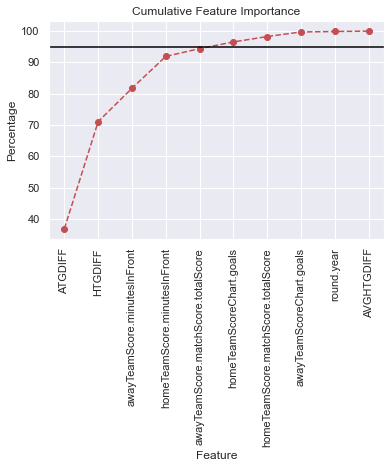

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.16 0.64 0.2 ]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

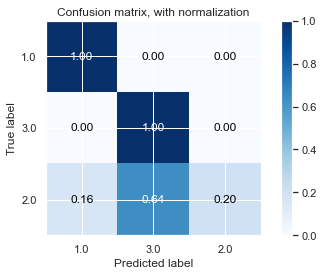

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 94.33%


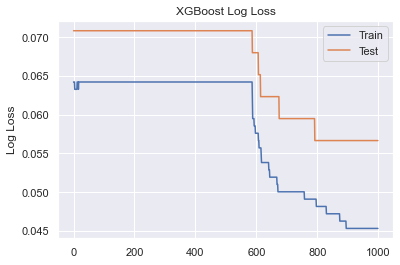

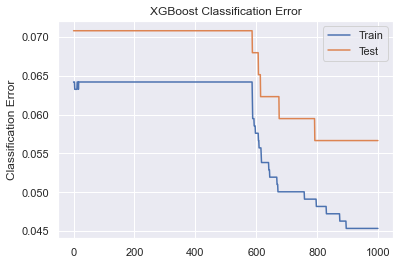

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
9,Western Bulldogs,Carlton,3.0
10,Sydney Swans,Geelong Cats,1.0
11,Collingwood,Adelaide Crows,3.0
12,Essendon,Brisbane Lions,3.0
13,Port Adelaide,Hawthorn,1.0
14,Gold Coast Suns,Melbourne,3.0
15,North Melbourne,West Coast Eagles,1.0
16,Richmond,GWS Giants,1.0
17,Fremantle,St Kilda,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
9,Western Bulldogs,Carlton,3.0,0.252457,0.176275,0.571269
10,Sydney Swans,Geelong Cats,1.0,0.767422,0.132687,0.099891
11,Collingwood,Adelaide Crows,3.0,0.084018,0.094101,0.821881
12,Essendon,Brisbane Lions,3.0,0.205353,0.293447,0.501201
13,Port Adelaide,Hawthorn,1.0,0.762952,0.132709,0.104338
14,Gold Coast Suns,Melbourne,3.0,0.080068,0.114416,0.805517
15,North Melbourne,West Coast Eagles,1.0,0.517449,0.183101,0.299450
16,Richmond,GWS Giants,1.0,0.767422,0.132687,0.099891
17,Fremantle,St Kilda,1.0,0.767422,0.132687,0.099891


In [27]:
# if Home wins: 1 + log2(p)
# if Home loses: 1 + log2(1-p)
# ig Home draws: 1 + 0.5 * log2(p*(1-p))


#xgb_df_next_games['home_prob'] = np.where(xgb_df_next_games['predicted_result']==3,xgb_df_next_games['prob_win'],xgb_df_next_games['prob_loss'])



import math




xgb_df_next_games['home_win_score'] = 1 + np.log2(xgb_df_next_games['prob_win'])
xgb_df_next_games['home_loss_score'] = 1 + np.log2(1-xgb_df_next_games['prob_win'])
xgb_df_next_games['home_draw_score'] = 1 + 0.5*np.log2( xgb_df_next_games['prob_win']*(1-xgb_df_next_games['prob_win']))





In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_win_score,home_loss_score,home_draw_score
9,Western Bulldogs,Carlton,3.0,0.252457,0.176275,0.571269,0.192241,-0.221854,-0.014807
10,Sydney Swans,Geelong Cats,1.0,0.767422,0.132687,0.099891,-2.323503,0.848172,-0.737666
11,Collingwood,Adelaide Crows,3.0,0.084018,0.094101,0.821881,0.717001,-1.489084,-0.386042
12,Essendon,Brisbane Lions,3.0,0.205353,0.293447,0.501201,0.003460,-0.003468,-0.000004
13,Port Adelaide,Hawthorn,1.0,0.762952,0.132709,0.104338,-2.260657,0.841026,-0.709816
14,Gold Coast Suns,Melbourne,3.0,0.080068,0.114416,0.805517,0.687986,-1.362282,-0.337148
15,North Melbourne,West Coast Eagles,1.0,0.517449,0.183101,0.299450,-0.739614,0.486560,-0.126527
16,Richmond,GWS Giants,1.0,0.767422,0.132687,0.099891,-2.323503,0.848172,-0.737666
17,Fremantle,St Kilda,1.0,0.767422,0.132687,0.099891,-2.323503,0.848172,-0.737666
